<a href="https://colab.research.google.com/github/ammshreya/InternalProject-CreditCardFraud/blob/main/internalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#loading te dataset
credit_card_data = pd.read_csv('creditcard.csv')

<ipython-input-39-5e93400cc941>:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_card_data = pd.read_csv('creditcard.csv')


In [40]:
#to get the firat 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [41]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33755,37372,0.597155,-1.457940,0.648770,-1.154721,-1.384692,-0.114190,-0.353940,0.077492,1.434997,...,0.266727,0.391858868587825,-0.248812,0.335329,0.164725,-0.063462,0.010369,0.068737,300.00,0.0
33756,37373,-7.504323,-15.633772,-4.215051,1.507090,-5.412604,3.243205,4.422388,-0.423582,0.392031,...,2.323590,-2.53917289990935,-3.736852,-0.792271,-1.694790,-0.463947,-0.703180,0.780931,4476.72,0.0
33757,37373,1.242547,0.010297,-1.206012,0.083576,2.171891,3.391877,-0.417041,0.793206,-0.149793,...,0.031822,-0.0638428726104072,-0.166334,1.008827,0.824605,-0.268009,0.016069,0.019513,28.56,0.0
33758,37373,-1.065865,1.177477,2.083773,1.296198,0.564073,0.295974,0.656915,0.158767,-1.006866,...,-0.157601,-0.518893364163089,-0.140236,-0.022273,0.117122,-0.358995,-0.201863,0.088919,0.00,0.0
33759,37373,-0.302250,0.828254,-0.311542,-1.108255,2.533421,3.274040,0.134693,0.933364,-0.505897,...,-0.314500,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#to get the information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33760 entries, 0 to 33759
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33760 non-null  int64  
 1   V1      33760 non-null  float64
 2   V2      33760 non-null  float64
 3   V3      33760 non-null  float64
 4   V4      33760 non-null  float64
 5   V5      33760 non-null  float64
 6   V6      33760 non-null  float64
 7   V7      33760 non-null  float64
 8   V8      33760 non-null  float64
 9   V9      33760 non-null  float64
 10  V10     33760 non-null  float64
 11  V11     33760 non-null  float64
 12  V12     33760 non-null  float64
 13  V13     33760 non-null  float64
 14  V14     33760 non-null  float64
 15  V15     33760 non-null  float64
 16  V16     33760 non-null  float64
 17  V17     33760 non-null  float64
 18  V18     33760 non-null  float64
 19  V19     33760 non-null  float64
 20  V20     33760 non-null  float64
 21  V21     33760 non-null  float64
 22

In [43]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [44]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    33656
1.0      103
Name: Class, dtype: int64

In [45]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [46]:
print(legit.shape)
print(fraud.shape)

(33656, 31)
(103, 31)


In [47]:
legit.Amount.describe()

count    33656.000000
mean        83.011607
std        227.811004
min          0.000000
25%          6.990000
50%         21.040000
75%         75.000000
max       7879.420000
Name: Amount, dtype: float64

In [48]:
fraud.Amount.describe()

count     103.000000
mean       90.471165
std       247.173335
min         0.000000
25%         1.000000
50%         3.760000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [49]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

<ipython-input-49-4fe90e2a08db>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  credit_card_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,23194.307464,-0.187654,0.072598,0.753847,0.187759,-0.199393,0.100208,-0.094713,0.020007,0.295446,...,-0.038628,0.043092,-0.033930,-0.041512,0.009386,0.134676,0.021468,0.009748,0.003296,83.011607
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.477900,0.652319,0.628539,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


In [50]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [51]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [52]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29324,35422,-2.245070,2.129219,0.296632,-1.495739,-0.543456,-1.302740,0.424917,0.124234,0.766927,...,-0.137439,-0.105716,0.064423,0.449664,-0.002999,0.679203,-0.502037,-0.239844,2.31,0.0
9633,14442,-0.885598,0.499750,2.207838,-1.019590,0.213922,0.131303,0.105987,0.255981,0.943874,...,0.042149,0.205735,-0.287046,-0.313946,0.142752,0.982378,-0.072340,0.029798,14.95,0.0
15475,26862,-0.622932,1.103183,1.267262,0.117764,-0.379612,-1.241877,0.569549,0.040425,0.114028,...,-0.298077,-0.836142,0.077085,0.595165,-0.224855,0.064099,0.337891,0.162390,11.36,0.0
11777,20174,-2.278075,-2.241390,2.144276,2.577710,-0.788018,0.980015,1.410935,-0.061736,1.675586,...,-0.044931,-0.637918,1.579117,0.289492,0.110313,-0.495641,-0.240070,-0.033235,612.64,0.0
11774,20159,1.194265,-0.447406,0.976789,-0.547286,-1.132901,-0.353470,-0.871202,0.136907,3.404659,...,-0.154742,-0.024256,0.024608,-0.017396,0.334491,-0.689394,0.069253,0.022171,6.70,0.0


In [53]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30442,35926,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1.0
30473,35942,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1.0
30496,35953,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70,1.0
31002,36170,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.96296,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1.0
33276,37167,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.59992625988411,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1.0


In [54]:

new_dataset['Class'].value_counts()

0.0    492
1.0    103
Name: Class, dtype: int64

In [55]:
new_dataset.groupby('Class').mean()

<ipython-input-55-586b59598b15>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_dataset.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,22969.036585,-0.142989,0.147101,0.638211,0.162271,-0.161712,0.142360,-0.056317,0.041473,0.258733,...,0.037096,0.038494,-0.008490,-0.078402,-0.013856,0.136705,0.004834,0.022940,-0.001633,82.750447
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.477900,0.652319,0.628539,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


Splitting the data into Features & Targets

In [56]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [57]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
29324  35422 -2.245070  2.129219  0.296632 -1.495739 -0.543456 -1.302740   
9633   14442 -0.885598  0.499750  2.207838 -1.019590  0.213922  0.131303   
15475  26862 -0.622932  1.103183  1.267262  0.117764 -0.379612 -1.241877   
11777  20174 -2.278075 -2.241390  2.144276  2.577710 -0.788018  0.980015   
11774  20159  1.194265 -0.447406  0.976789 -0.547286 -1.132901 -0.353470   
...      ...       ...       ...       ...       ...       ...       ...   
30442  35926 -3.896583  4.518355 -4.454027  5.547453 -4.121459 -1.163407   
30473  35942 -4.194074  4.382897 -5.118363  4.455230 -4.812621 -1.224645   
30496  35953 -4.844372  5.649439 -6.730396  5.252842 -4.409566 -1.740767   
31002  36170 -5.685013  5.776516 -7.064977  5.902715 -4.715564 -1.755633   
33276  37167 -7.923891 -5.198360 -3.000024  4.420666  2.272194 -3.394483   

             V7        V8        V9  ...       V20       V21  \
29324  0.424917  0.1242

In [58]:
print(Y)

29324    0.0
9633     0.0
15475    0.0
11777    0.0
11774    0.0
        ... 
30442    1.0
30473    1.0
30496    1.0
31002    1.0
33276    1.0
Name: Class, Length: 595, dtype: float64


Spliting the data into Training data and Testing data

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [60]:
print(X.shape,X_train.shape,X_test.shape)

(595, 30) (476, 30) (119, 30)


Training the model
Logistic Regression

In [62]:
model = LogisticRegression()

In [63]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [65]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9705882352941176


In [66]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [67]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9663865546218487


<ipython-input-70-51c5baed0bb7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = credit_card_data.corr()


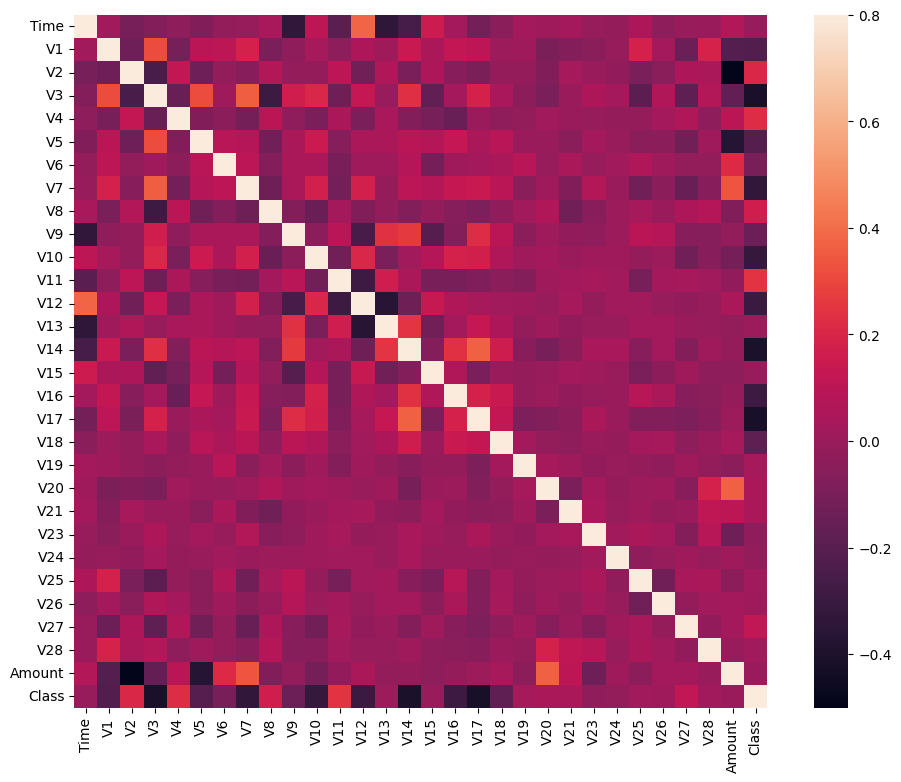

In [70]:
corrmat = credit_card_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()